In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#Load Dataset


In [45]:
file_path="/content/sample_data/housing.csv"

In [46]:
data=pd.read_csv(file_path)

In [47]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [48]:
data.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [50]:
data["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [51]:
# checking missing value
missing_values=data.isnull().sum()
# claculate percentage
missing_percentage=(missing_values/len(data))*100
print("Missing Value in Each Column:\n", missing_values)
print("\n percentage of missingdata:", missing_percentage)

Missing Value in Each Column:
 longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

 percentage of missingdata: longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64


In [52]:
# remove row with missing value
data_cleaned=data.dropna()
print("\n Missing Values in Column after removel:")
print(data_cleaned.isnull().sum())


 Missing Values in Column after removel:
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


# Data Exploration And Visualization

In [53]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


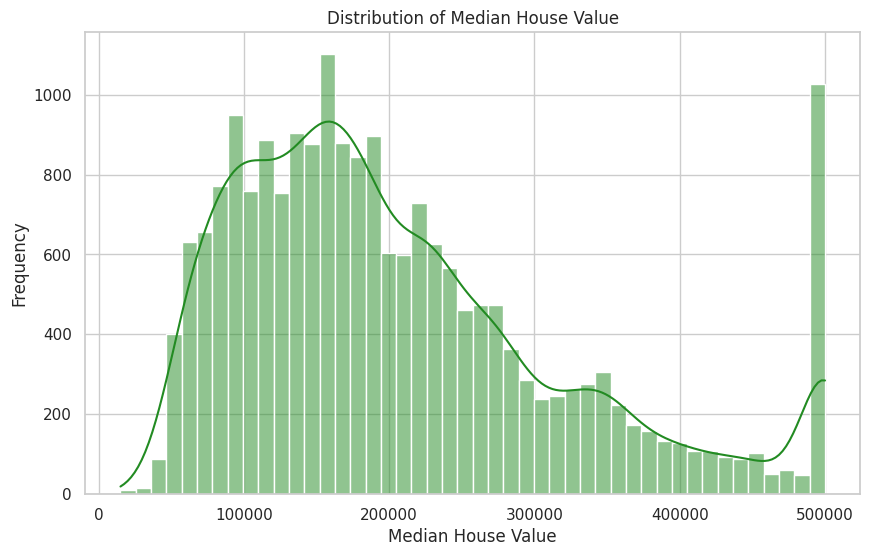

In [54]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.histplot(data_cleaned["median_house_value"], color="forestgreen", kde=True)
plt.title("Distribution of Median House Value")
plt.xlabel("Median House Value")
plt.ylabel("Frequency")
plt.show()

# Using Interqualtile range to remove outliers


In [55]:
# Assuming data in dataframe
Q1=data_cleaned["median_house_value"].quantile(0.25)
print("Q1:",Q1)
Q3=data_cleaned["median_house_value"].quantile(0.75)
print("Q3:",Q3)
IQR=Q3-Q1
print("IQR:",IQR)
# define bounds for outliers
lower_bound=Q1-1.5*IQR
print("lower-Bond",lower_bound)
upper_bound=Q3+1.5*IQR
print("Upper:",upper_bound)
# remove outliers
data_no_outliers_1=data_cleaned[(data_cleaned["median_house_value"]>=lower_bound) & (data_cleaned["median_house_value"]<=upper_bound)]
# check the shape before and after
print("Original data shape:", data_cleaned.shape)
print("New data shape without outlier:", data_no_outliers_1.shape)

Q1: 119500.0
Q3: 264700.0
IQR: 145200.0
lower-Bond -98300.0
Upper: 482500.0
Original data shape: (20433, 10)
New data shape without outlier: (19369, 10)


# BoxPlot for Outlier Detection



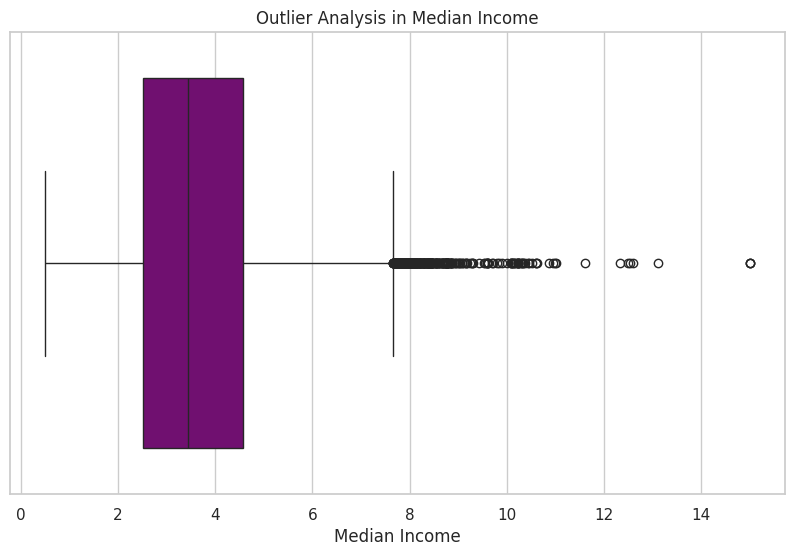

In [56]:
plt.figure(figsize=(10,6))
sns.boxplot(x=data_no_outliers_1["median_income"], color="purple")
plt.title('Outlier Analysis in Median Income')
plt.xlabel("Median Income")
plt.show()

In [57]:
# Assuming data in dataframe
Q1=data_no_outliers_1["median_income"].quantile(0.25)
Q3=data_no_outliers_1["median_income"].quantile(0.75)
IQR=Q3-Q1
# define bounds for outliers
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
# remove outliers
data_no_outliers_2 =data_no_outliers_1[(data_no_outliers_1["median_income"]>=lower_bound) & (data_no_outliers_1["median_income"]<=upper_bound)]
# check the shape before and after
print("Original Data Shape:", data_no_outliers_1.shape)
print("Data shape without outlier:", data_no_outliers_2.shape)

Original Data Shape: (19369, 10)
Data shape without outlier: (19026, 10)


In [58]:
data=data_no_outliers_2

# Correlation Heat Map






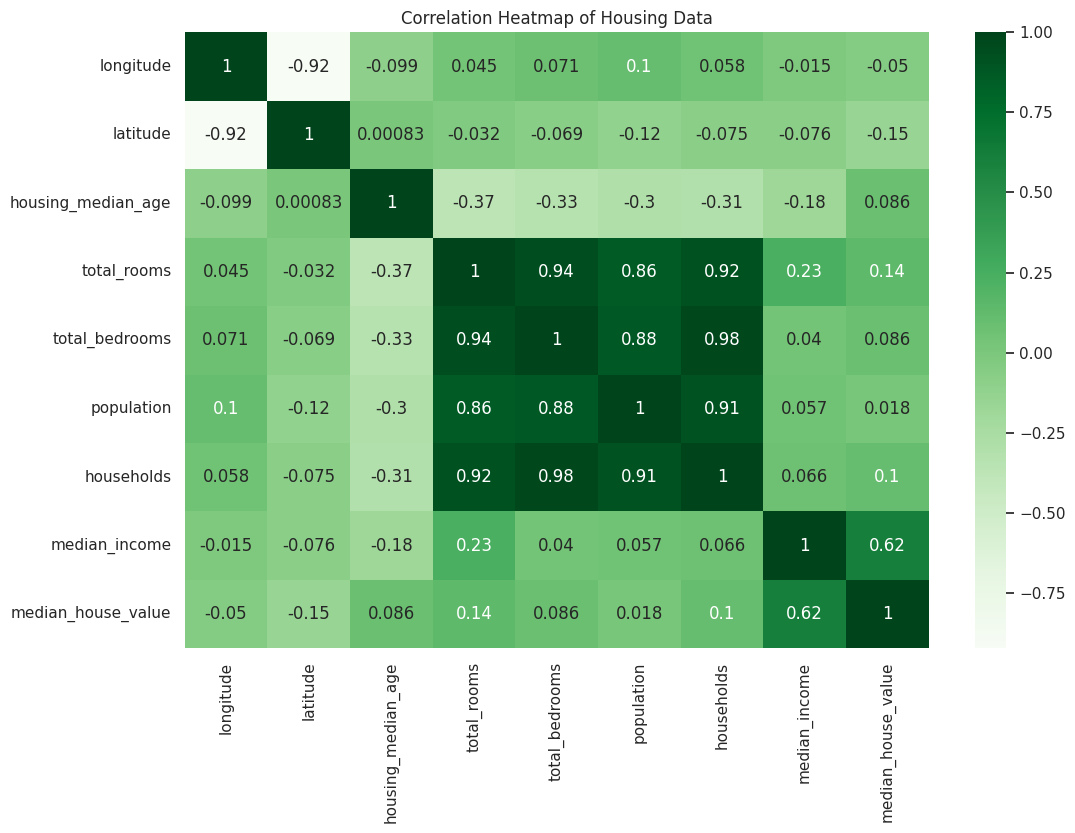

In [59]:
numeric_columns = data.select_dtypes(include='number')
correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Greens')
plt.title('Correlation Heatmap of Housing Data')
plt.show()

In [60]:
data=data.drop("total_bedrooms",axis=1)
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'median_house_value',
       'ocean_proximity'],
      dtype='object')

In [61]:
# Unique value  count for categorical data
for column in ["ocean_proximity"]:
  print(f"Unique values in {column}:",data[column].unique())

Unique values in ocean_proximity: ['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


# String Data Categorization to Dummy Variables

In [62]:
ocean_proximity_dummies = pd.get_dummies(data['ocean_proximity'], prefix='ocean_proximity').astype(int)
data = pd.concat([data.drop("ocean_proximity", axis =1), ocean_proximity_dummies], axis=1)
ocean_proximity_dummies



,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
5,0,0,0,1,0
6,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [63]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'median_house_value',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [64]:
data= data.drop("ocean_proximity_ISLAND",axis=1)
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'median_house_value',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [65]:
data.head(10)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
2,-122.24,37.85,52.0,1467.0,496.0,177.0,7.2574,352100.0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,558.0,219.0,5.6431,341300.0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,565.0,259.0,3.8462,342200.0,0,0,1,0
5,-122.25,37.85,52.0,919.0,413.0,193.0,4.0368,269700.0,0,0,1,0
6,-122.25,37.84,52.0,2535.0,1094.0,514.0,3.6591,299200.0,0,0,1,0
7,-122.25,37.84,52.0,3104.0,1157.0,647.0,3.1200,241400.0,0,0,1,0
8,-122.26,37.84,42.0,2555.0,1206.0,595.0,2.0804,226700.0,0,0,1,0
9,-122.25,37.84,52.0,3549.0,1551.0,714.0,3.6912,261100.0,0,0,1,0
10,-122.26,37.85,52.0,2202.0,910.0,402.0,3.2031,281500.0,0,0,1,0
11,-122.26,37.85,52.0,3503.0,1504.0,734.0,3.2705,241800.0,0,0,1,0


# split the data into train/text

In [66]:
# Definr Features and Targets
features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']
target = ["median_house_value"]

x=data[features]
y=data[target]

# split the data into trainset and testset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1111)
print(f'Training set size:, {x_train.shape[0]} samples')
print(f'Test set size:, {x_test.shape[0]} samples')


Training set size:, 15220 samples
Test set size:, 3806 samples


In [67]:
x_train

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
15578,-116.90,33.03,11.0,3213.0,1975.0,579.0,3.4750,1,0,0,0
1656,-121.93,37.89,13.0,2085.0,852.0,264.0,7.3445,0,1,0,0
9190,-118.35,34.32,52.0,102.0,54.0,32.0,1.9875,1,0,0,0
11839,-120.95,39.93,26.0,2023.0,922.0,365.0,2.8125,0,1,0,0
12267,-116.91,33.75,13.0,10886.0,4266.0,1955.0,2.3169,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
15355,-117.32,33.25,7.0,8206.0,4399.0,1423.0,3.6301,1,0,0,0
9608,-120.51,37.29,20.0,4927.0,4205.0,1009.0,1.7679,0,1,0,0
12606,-121.49,38.50,32.0,2364.0,1331.0,449.0,3.3190,0,1,0,0
2907,-119.03,35.37,52.0,1503.0,554.0,277.0,1.6786,0,1,0,0


In [68]:
# Add constent
x_train_const=sm.add_constant(x_train)
x_train_const



,const,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
15578,1.0,-116.90,33.03,11.0,3213.0,1975.0,579.0,3.4750,1,0,0,0
1656,1.0,-121.93,37.89,13.0,2085.0,852.0,264.0,7.3445,0,1,0,0
9190,1.0,-118.35,34.32,52.0,102.0,54.0,32.0,1.9875,1,0,0,0
11839,1.0,-120.95,39.93,26.0,2023.0,922.0,365.0,2.8125,0,1,0,0
12267,1.0,-116.91,33.75,13.0,10886.0,4266.0,1955.0,2.3169,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15355,1.0,-117.32,33.25,7.0,8206.0,4399.0,1423.0,3.6301,1,0,0,0
9608,1.0,-120.51,37.29,20.0,4927.0,4205.0,1009.0,1.7679,0,1,0,0
12606,1.0,-121.49,38.50,32.0,2364.0,1331.0,449.0,3.3190,0,1,0,0
2907,1.0,-119.03,35.37,52.0,1503.0,554.0,277.0,1.6786,0,1,0,0


In [69]:
#  Fit OLS Model
model_fitted=sm.OLS(y_train,x_train_const).fit()
# print the summary
print(model_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     1973.
Date:                Fri, 27 Dec 2024   Prob (F-statistic):               0.00
Time:                        09:58:38   Log-Likelihood:            -1.8879e+05
No. Observations:               15220   AIC:                         3.776e+05
Df Residuals:                   15208   BIC:                         3.777e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

# Prediction/Testing

In [70]:
# Add constant to the test predictor
x_test_const=sm.add_constant(x_test)

# making Predictions on the test set
test_predictions=model_fitted.predict(x_test_const)
test_predictions


,0
7322,153414.201880
465,239312.044180
12768,70054.781175
2617,189568.171319
13351,184267.795032
...,...
11691,171568.742378
1454,215893.783794
7360,129935.765388
19118,232846.312809


# Checking OLS Assumtions

# Assumption 1: Linearity

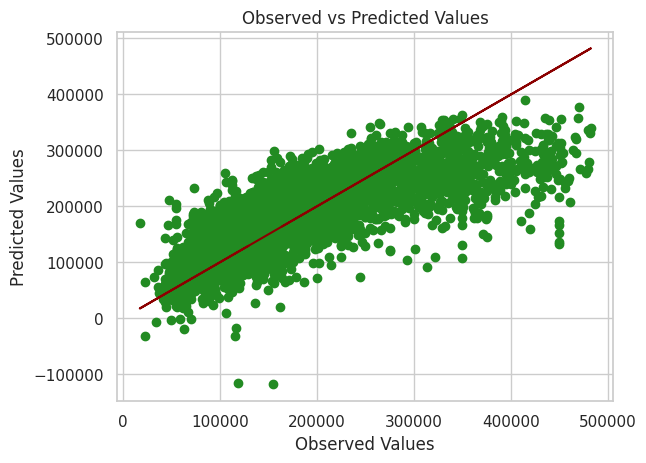

In [71]:
# scatter plot for observed vs predicted value
plt.scatter(y_test, test_predictions, color="forestgreen")
plt.xlabel("Observed Values")
plt.ylabel("Predicted Values")
plt.title("Observed vs Predicted Values")
plt.plot(y_test,y_test,color='darkred') # Line for prediction (true values)
plt.show()

# Assumtion 2: Random Sample

In [72]:
#  Calclate the mean of the residuals
mean_residuals=np.mean(model_fitted.resid)
print(f'The mean of the residuals is: {np.round(mean_residuals,2)}')

The mean of the residuals is: 0.0


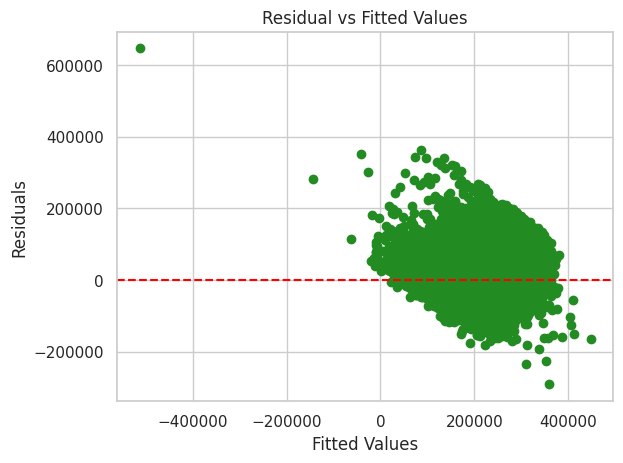

In [73]:
# Plotting the residuals

plt.scatter(model_fitted.fittedvalues, model_fitted.resid, color="forestgreen")
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual vs Fitted Values")
plt.show()

# Assumtion 3: Exogeneity

In [74]:
# calculate the residuals
residuals=model_fitted.resid

# Check fro correlation between residuals and each predictor
for column in  x_train.columns:
  corr_coefficient=np.corrcoef(residuals, x_train[column])[0,1]
  print(f'Correlation between residuals and {column}: {np.round(corr_coefficient,2)}')

Correlation between residuals and longitude: -0.0
Correlation between residuals and latitude: 0.0
Correlation between residuals and housing_median_age: -0.0
Correlation between residuals and total_rooms: 0.0
Correlation between residuals and population: 0.0
Correlation between residuals and households: 0.0
Correlation between residuals and median_income: 0.0
Correlation between residuals and ocean_proximity_<1H OCEAN: -0.0
Correlation between residuals and ocean_proximity_INLAND: 0.0
Correlation between residuals and ocean_proximity_NEAR BAY: -0.0
Correlation between residuals and ocean_proximity_NEAR OCEAN: 0.0


# Assumtion 4: Homoskedasticty

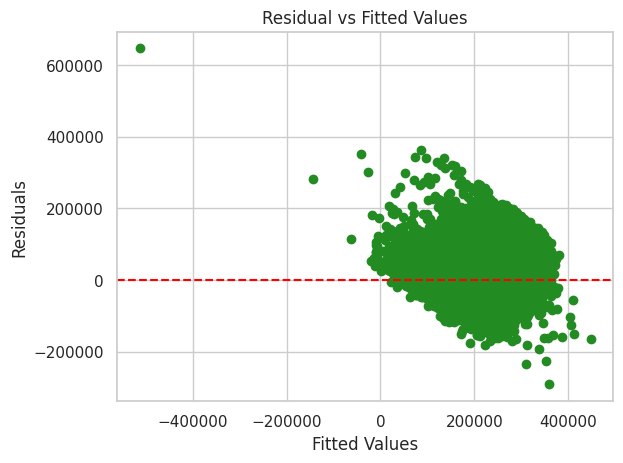

In [75]:
# plotting the residuals

plt.scatter(model_fitted.fittedvalues, model_fitted.resid, color="forestgreen")
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual vs Fitted Values")
plt.show()

# Train/Test/Evaluation with Sklearn

# scaling the data


In [76]:
from sklearn.preprocessing import StandardScaler
# initialize the standard scaler
scaler=StandardScaler()
# Fit the scaler on the training data and transform it
x_train_scaled=scaler.fit_transform(x_train)
# transform the test data
x_test_scaled=scaler.transform(x_test)

In [77]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
# create and fit the model
lr=LinearRegression()
lr.fit(x_train_scaled,y_train)
# Make the predictions on the scaled test data
y_pred=lr.predict(x_test_scaled)
# Calculate MSE  and RMSE
mse=mean_squared_error(y_test,y_pred)
rmse=sqrt(mse)
# Output the performance matrics
print(f'RMSE on test set: {rmse}')

RMSE on test set: 59405.88869441674


In [78]:
print(y_pred)
y_test

[[153414.2018804 ]
 [239312.04418031]
 [ 70054.78117497]
 ...
 [129935.7653883 ]
 [232846.31280863]
 [207120.21348536]]


,median_house_value
7322,164400.0
465,196400.0
12768,65200.0
2617,73600.0
13351,195100.0
...,...
11691,217000.0
1454,229200.0
7360,142000.0
19118,200600.0
